# 2022-01-08 • 1000-to-1

In [289]:
include("nb_init.jl");

using Revise
using Distributions
using PyFormattedStrings, PartialFunctions, FilePaths, LaTeXStrings
using Unitful: mV, Hz, ms, s as second, minute
using PyPlot: PyPlot as plt, matplotlib as mpl
using VoltageToMap


In [290]:
save = savefig $ (; subdir="methods");

## Generate spikes

We want Poisson firing, i.e. ISIs with an exponential distribution.  
Firing rates lognormally distributed (instead of all the same, as before).

In [291]:
"""
`μ` and `σ` are mean and standard deviation of the underlying Gaussian.
`mean` is the mean of the log of the Gaussian.
"""
function LogNormal_with_mean(mean, σ)
    μ = log(mean) - σ^2 / 2
    LogNormal(μ, σ)
end;

In [292]:
# Mean and variance from Roxin2011 (cross checked with its refs Hromádka, O'Connor).

input_spike_rate = LogNormal_with_mean(4, √(1.04))  # both in Hz

LogNormal{Float64}(μ=0.8662943611198906, σ=1.019803902718557)

In [293]:
# Define probability distributions on units.
Distributions.pdf(d, x::Quantity) = pdf(d, ustrip(x)) / unit(x)
Distributions.cdf(d, x::Quantity) = cdf(d, ustrip(x))

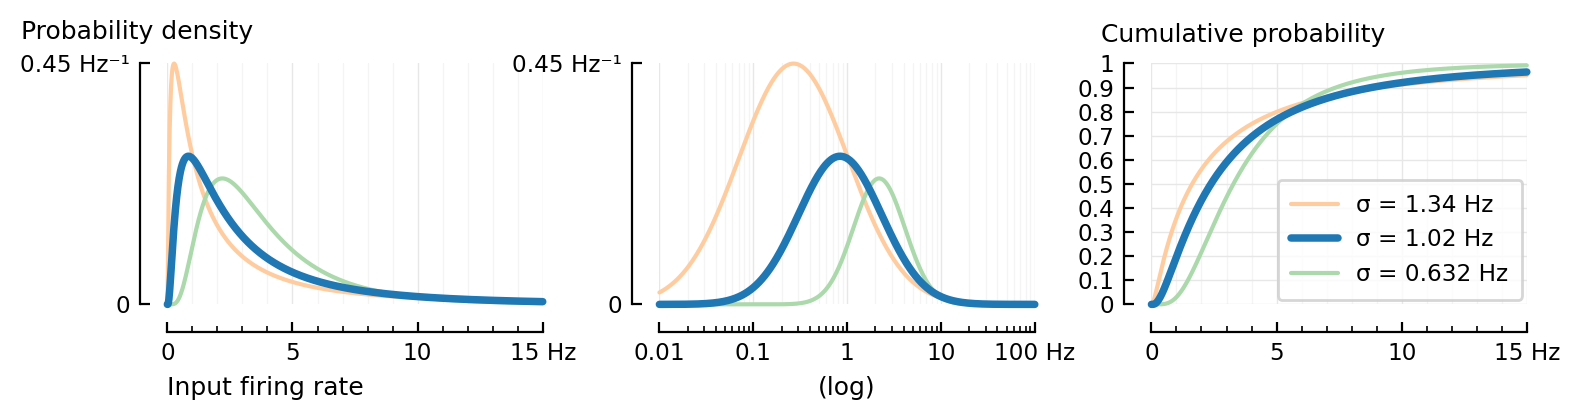

In [297]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 2.2))

rlin = (0:0.01:15)Hz
rlog = exp10.(-2:0.01:2)Hz
function plot_firing_rate_distr(distr; kw...)
    plot(rlin, pdf.(distr, rlin), ax1; clip_on=false, label=f"σ = {distr.σ:.3g} Hz", kw...)
    plot(rlog, pdf.(distr, rlog), ax2; clip_on=false, label=f"σ = {distr.σ:.3g} Hz", xscale="log", kw...)
    plot(rlin, cdf.(distr, rlin), ax3; clip_on=false, label=f"σ = {distr.σ:.3g} Hz", ylim=(0,1), kw...)
end

plot_firing_rate_distr(LogNormal_with_mean(4, √1.8), c=lighten(C1, 0.6))
plot_firing_rate_distr(LogNormal_with_mean(4, √0.4), c=lighten(C2, 0.6))
plot_firing_rate_distr(input_spike_rate, c=C0, lw=2.7)

set(ax1; xlabel="Input firing rate", ytickstyle=:range)
set(ax2; ytickstyle=:range)
set(ax3; yminorticks=false)
legend(ax3, reorder=[3 => 2])
ylabel(ax1, "Probability density", dx=-52.8)
ylabel(ax3, "Cumulative probability", dy=6, dx=-18)
ax2.set_xlabel("(log)", loc="center")
plt.tight_layout(w_pad=-2.3)

save("lognormal.pdf")

They have the same mean. Reason is that the early risers also have heavier tails (even though you can't see it here).

In [272]:
N_exc    = 1600
N_inh    = 400
N_unconn = 100;

In [273]:
rand(input_spike_rate, N_exc) * Hz

1600-element Vector{Quantity(::Float64, Hz)}:
  7.65434
  2.17313
  3.43088
  0.916827
  1.89193
  1.31718
  0.797588
 11.158
  5.08966
  2.87991
 11.1623
  1.62866
  2.26921
  ⋮
  0.408976
  0.531956
  0.316434
 13.8515
  4.4932
  2.88617
 10.2213
  1.25269
  0.714683
  3.82916
  0.455604
  1.36575